## Gaining insights and future predictions from **Stock time series data**

### Time Series Analysis of AAPL and MSFT Stocks
This notebook performs time series analysis on two stocks: **Apple (AAPL)** and **Microsoft (MSFT)** using historical price data from Yahoo Finance.

We'll cover:
* Load Data
* Preprocessing(null values)
* Initial plot
* Decompose Time Series → visualize trend/seasonality/residual
* Check for Stationarity (ADF Test, KPSS Test)
* [OPTIONAL] If no clear result is achieved we try transformation and differencing.
* Make Stationary (if needed)
* ACF & PACF plots
* Apply different models which is found out to be suitable with the help of ACF & PACF plots
* Evaluate
* Find the best and a conclusion
* Apply Gairach
* Apply ML

### Importing Libraries and Data

In [10]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings

from statsmodels.tsa.stattools import adfuller, kpss
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
warnings.filterwarnings('ignore')
tickers = ['AAPL', 'MSFT']

aapl=yf.download('AAPL', start='2024-01-01')
msft = yf.download('MSFT', start='2024-01-01')


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


### Plotting an initial plot for Close Price

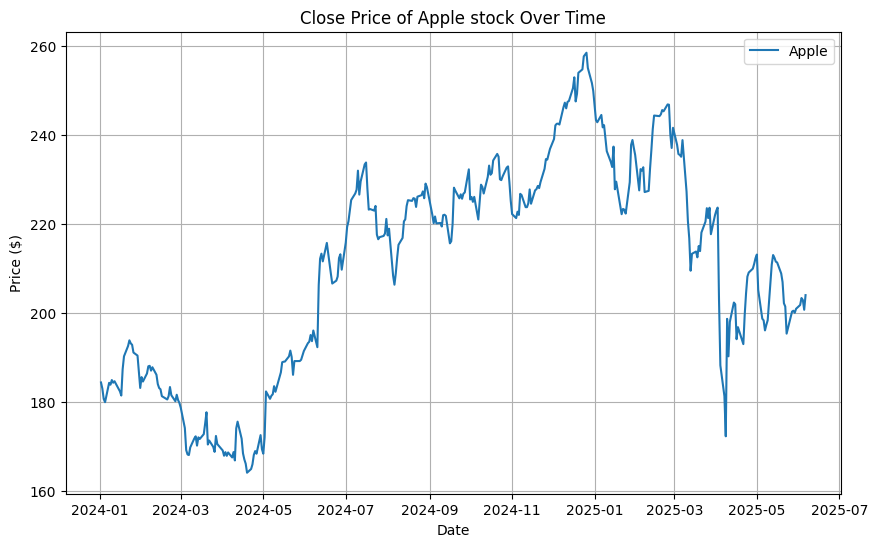

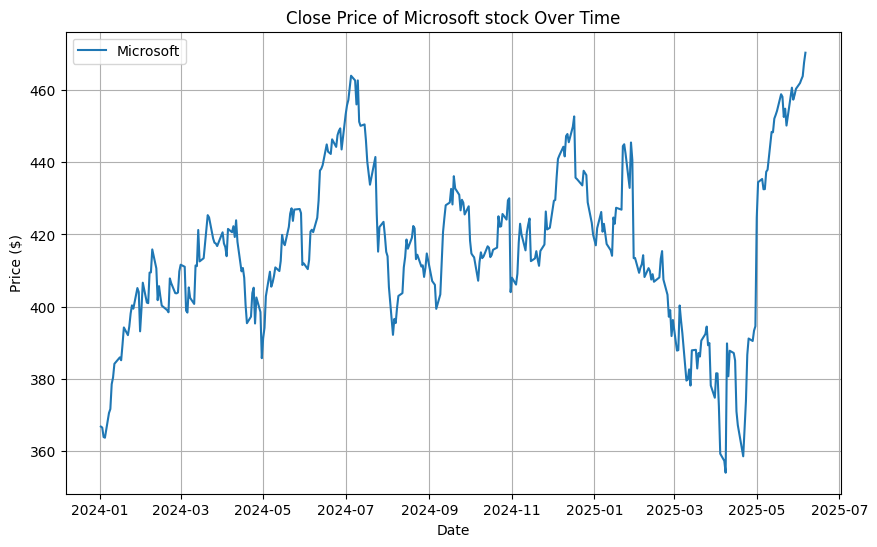

In [3]:
%matplotlib inline
plt.figure(figsize=(10,6))
plt.plot(aapl['Close'], label='Apple')
plt.title('Close Price of Apple stock Over Time')
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.grid(True)
plt.legend()

plt.figure(figsize=(10,6))
plt.plot(msft['Close'], label='Microsoft')
plt.title('Close Price of Microsoft stock Over Time')
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.grid(True)
plt.legend()


plt.show()

### Time Series Decomposition of Apple

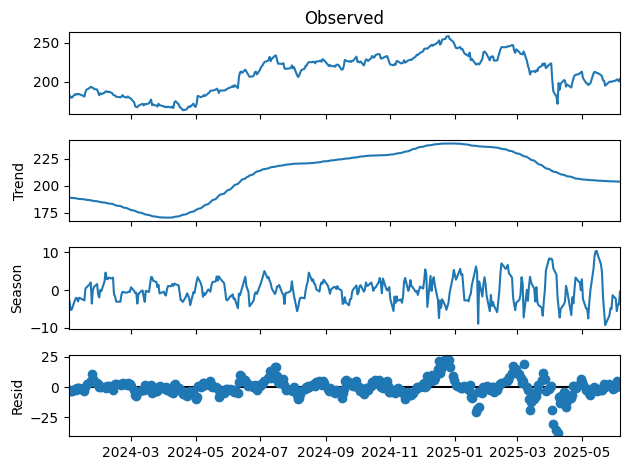

In [16]:
from statsmodels.tsa.seasonal import STL

stl = STL(aapl['Close'], period=30, robust=True)
res = stl.fit()
res.plot()
aapl_resid=res.resid.dropna()
plt.show()

### Time Series Decomposition of Microsoft

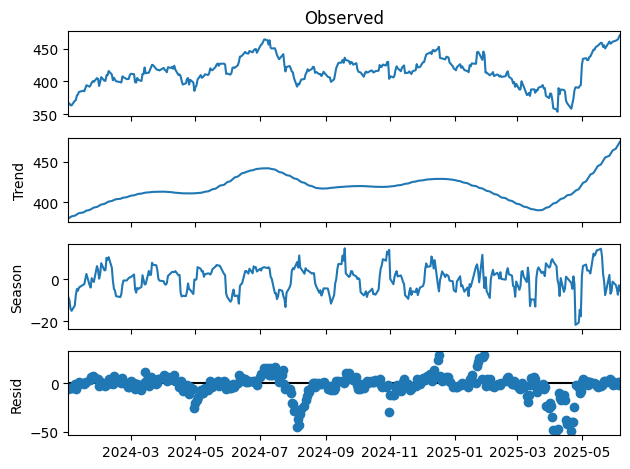

In [17]:
msftstl=STL(msft['Close'], period=30, robust=True)
res1=msftstl.fit()
res1.plot()
msft_resid=res1.resid.dropna()
plt.show()

### Applying Check for Stationary

In [14]:
print("ADF Test on Apple stock data:")
adf_aapl = adfuller(aapl['Close'])
print(f"ADF Statistic: {adf_aapl[0]}")
p_adf_aapl=adf_aapl[1]
print(f"p-value: {adf_aapl[1]}")

stat, p_kpss_aapl, _, _ = kpss(aapl['Close'], regression='ct')
print(f"KPSS Statistic: {stat}")
print(f"p-value: {p_kpss_aapl}")

if(p_adf_aapl<0.05 and p_kpss_aapl>=0.05):
    print("Stationary")
elif(p_adf_aapl>=0.05 and p_kpss_aapl<0.05):
    print("Not Stationary")
else:
    print("Cannot be concluded.")



ADF Test on Apple stock data:
ADF Statistic: -1.8022241060395032
p-value: 0.37935804712036303
KPSS Statistic: 0.5222338076975954
p-value: 0.01
Not Stationary


In [20]:
print("ADF Test on Microsoft stock data:")
adf_msft = adfuller(msft['Close'])
print(f"ADF Statistic: {adf_msft[0]}")
p_adf_msft=adf_msft[1]
print(f"p-value: {adf_msft[1]}")

stat, p_kpss_msft, _, _ = kpss(msft['Close'], regression='ct')
print(f"KPSS Statistic: {stat}")
print(f"p-value: {p_kpss_msft}")

if(p_adf_msft<0.05 and p_kpss_msft>=0.05):
    print("Stationary")
elif(p_adf_msft>=0.05 and p_kpss_msft<0.05):
    print("Not Stationary")
else:
    print("Cannot be concluded.")



ADF Test on Microsoft stock data:
ADF Statistic: -2.5003881970766173
p-value: 0.11537990078792831
KPSS Statistic: 0.18464553856391291
p-value: 0.021757923038532655
Not Stationary


### Making the stock data stationary

In [ ]:
# ✅ Summary Cheat Sheet
# Condition	Fix
# Trend only	First-order differencing
# Increasing variance	Log transform
# Seasonal pattern	Seasonal differencing
# Both trend + seasonality	Combined differencing or STL
# Complex/unknown	Try STL decomposition

#### Using STL Residuals as it has no trend or seasonality so it is stationary
#### Now will be applying stationary tests again on the residuals

In [21]:
print("ADF Test on Apple stock data:")
adf_aapl_resid = adfuller(aapl_resid)
print(f"ADF Statistic: {adf_aapl_resid[0]}")
p_adf_aapl_resid=adf_aapl_resid[1]
print(f"p-value: {adf_aapl_resid[1]}")

stat_resid, p_kpss_aapl_resid, _resid, _resid1 = kpss(aapl_resid, regression='c')
print(f"KPSS Statistic: {stat_resid}")
print(f"p-value: {p_kpss_aapl_resid}")

if(p_adf_aapl_resid<0.05 and p_kpss_aapl_resid>=0.05):
    print("Stationary")
elif(p_adf_aapl_resid>=0.05 and p_kpss_aapl_resid<0.05):
    print("Not Stationary")
else:
    print("Cannot be concluded.")

print("\n----------------------------------------------------------------------------------------------------------------------\n")
print("ADF Test on Microsoft stock data:")
adf_msft_resid = adfuller(msft_resid)
print(f"ADF Statistic: {adf_msft_resid[0]}")
p_adf_msft_resid=adf_msft_resid[1]
print(f"p-value: {adf_msft_resid[1]}")

stat_resid, p_kpss_msft_resid, _resid, _resid1 = kpss(msft_resid, regression='c')
print(f"KPSS Statistic: {stat_resid}")
print(f"p-value: {p_kpss_msft_resid}")

if(p_adf_msft_resid<0.05 and p_kpss_msft_resid>=0.05):
    print("Stationary")
elif(p_adf_msft_resid>=0.05 and p_kpss_msft_resid<0.05):
    print("Not Stationary")
else:
    print("Cannot be concluded.")

ADF Test on Apple stock data:
ADF Statistic: -5.786707728160757
p-value: 4.979978701589834e-07
KPSS Statistic: 0.07319858840089496
p-value: 0.1
Stationary

----------------------------------------------------------------------------------------------------------------------

ADF Test on Microsoft stock data:
ADF Statistic: -4.65382748345175
p-value: 0.00010266703166893783
KPSS Statistic: 0.2028592016581788
p-value: 0.1
Stationary


#### Now the data is Stationary, will be plotting ACF & PACF Plots

### ACF & PACF Plots

<Figure size 1000x400 with 0 Axes>

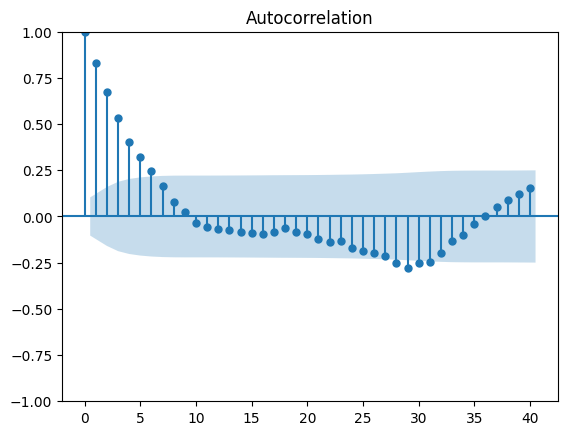

<Figure size 1000x400 with 0 Axes>

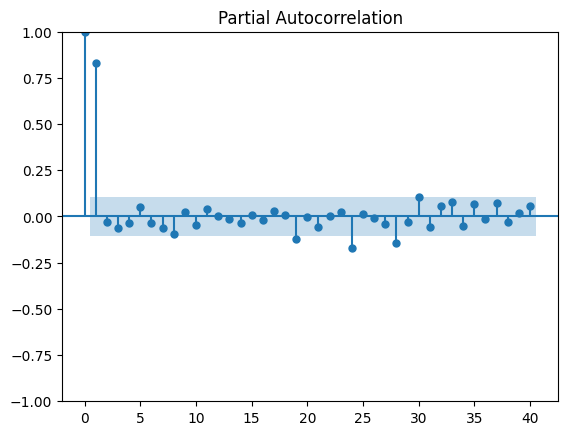

In [22]:
plt.figure(figsize=(10, 4))
plot_acf(aapl_resid, lags=40)
plt.show()

plt.figure(figsize=(10, 4))
plot_pacf(aapl_resid, lags=40)
plt.show()
